In [50]:
pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 70.4 MB/s eta 0:00:00


In [3]:
#libraries
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### loading data set
'

In [5]:
data=pd.read_csv("/content/drive/My Drive/sales.csv", encoding='latin1')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


### Handling the null values in the data set.

In [6]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)


data['Actual Delay'] = data['Days for shipping (real)'] - data['Days for shipment (scheduled)']


Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [7]:
# Drop irrelevant columns
sm_data = data.drop(columns=['Product Description', 'Order Zipcode'])

# Fill missing values for Customer Lname and Customer Zipcode
sm_data['Customer Lname'] = data['Customer Lname'].fillna("Unknown")
sm_data['Customer Zipcode'] = data['Customer Zipcode'].fillna(data['Customer Zipcode'].mode()[0])

# Verify missing values are handled
print(sm_data.isnull().sum())


Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

### Transformation and Feature Engineering

In [8]:
# Convert date columns
sm_data['order date (DateOrders)'] = pd.to_datetime(sm_data['order date (DateOrders)'])
sm_data['shipping date (DateOrders)'] = pd.to_datetime(sm_data['shipping date (DateOrders)'])

# Encode categorical variables
sm_data = pd.get_dummies(sm_data, columns=['Shipping Mode', 'Order Region'], drop_first=False)

In [9]:
# Create derived features
sm_data['Actual Delay'] = sm_data['Days for shipping (real)'] - sm_data['Days for shipment (scheduled)']
sm_data['Profit Margin'] = sm_data['Order Profit Per Order'] / sm_data['Sales']

sm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 78 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

### EDA

In [10]:
print(data.describe())


       Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
std                    1.623722                       1.374449   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
std           104.433526          120.043670            0.497664   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000 

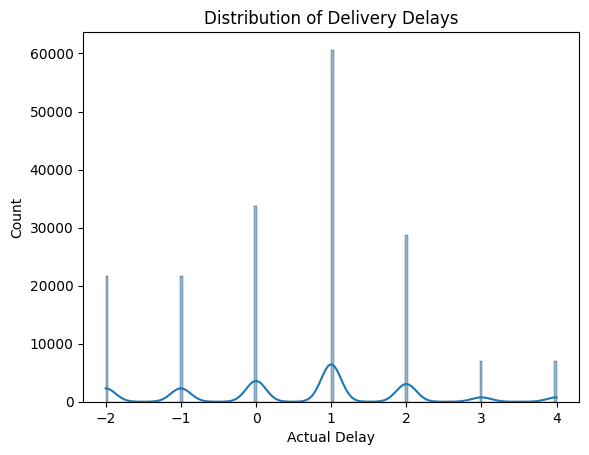

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(sm_data['Actual Delay'], kde=True)
plt.title("Distribution of Delivery Delays")
plt.show()


Key Observations:

Peak at 1: Most deliveries were delayed by 1 day, indicating that minor delays are common in your dataset.
Negative Delays: There are also significant cases where deliveries were made earlier than expected (e.g., -1, -2).
Long Delays: Fewer deliveries were delayed by 3 or more days, as indicated by smaller bars towards the right.

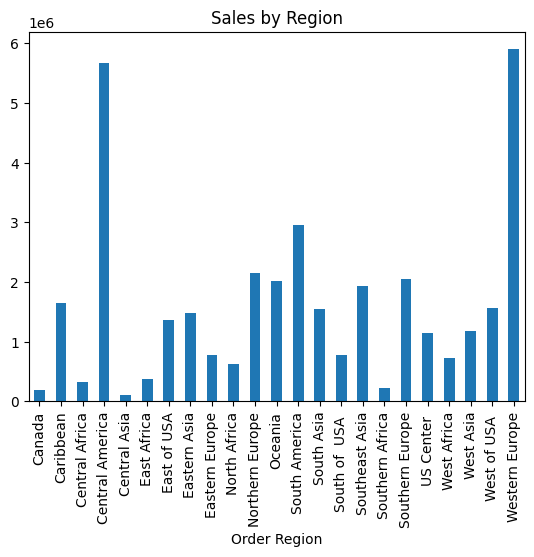

In [12]:
sales_by_region = data.groupby('Order Region')['Sales'].sum()
sales_by_region.plot(kind='bar', title="Sales by Region")
plt.show()


In [13]:
# Select only numeric columns
numeric_data = sm_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()


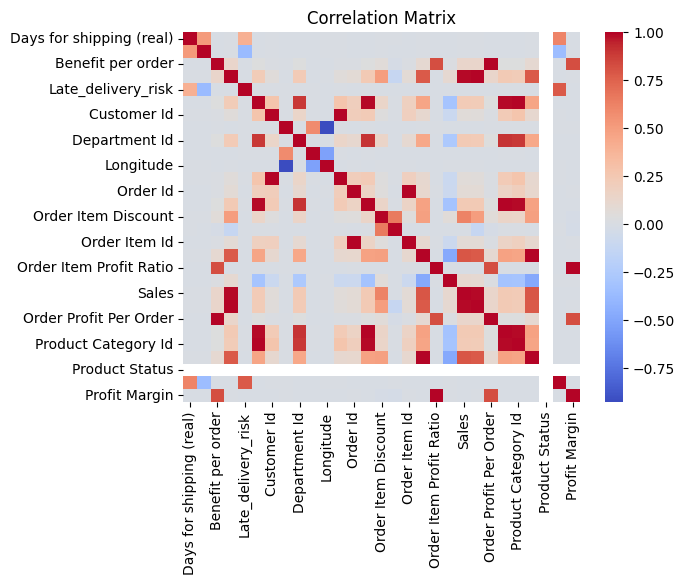

In [14]:
# Plot the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Strong Positive Correlations (Red Areas):

Sales and Order Item Total are highly correlated (near 1). This makes sense, as total sales depend on the number of items sold.
Profit Margin and Order Profit Per Order are positively correlated.
Negative Correlations (Blue Areas):

Order Item Discount Rate and Order Item Profit Ratio are negatively correlated. This indicates that higher discounts tend to reduce profit margins.
Days for shipping (real) and Late_delivery_risk may show some negative relationship, suggesting that longer actual shipping times contribute to late deliveries.
Weak or No Correlations (Gray/Neutral Areas):

Features like Customer Id, Department Id, and Longitude have very little correlation with other variables, indicating they may not contribute significantly to delivery performance or financial metrics.

Key Aspects of the Chart
X-Axis: Represents the different regions where shipments are delivered.

Each bar corresponds to a region (e.g., Canada, Caribbean, Central Africa).
Y-Axis: Represents the number of shipments allocated to each region.

The height of the bar shows the volume of shipments.
Colors (Legend): Represent the different shipping modes:

Blue: First Class.
Orange: Same Day.
Green: Second Class.
Red: Standard Class.
Key Observations
1. Heavy Use of Standard Class (Red Bars)
Standard Class dominates many regions (e.g., Canada, Caribbean, South America, Western Europe).
This is likely due to:
High capacity (107,752 units).
Lower delay values for many regions.
Regions like Canada, South America, and South Asia rely exclusively on Standard Class.
2. Regional Variations in Shipping Modes
Central America and Western Europe have diverse allocations across multiple shipping modes:
Central America:
Uses both First Class (Blue) and Second Class (Green) significantly.
Likely driven by high demand (28,341 units) and the need for faster deliveries.
Western Europe:
Heavy reliance on First Class and Standard Class, reflecting its large demand (27,109 units).
3. Specific Modes for Certain Regions
Some regions exclusively rely on one or two modes:
Central Africa: Primarily uses Same Day (Orange).
Eastern Europe: Balanced use of Same Day and Second Class.
4. Minimal Use of First Class (Blue Bars)
First Class is sparingly used across regions, likely due to:
Higher delays or higher costs.
Exceptions: Western Europe and Central America, where First Class is used significantly to meet demand.
5. Same Day (Orange Bars) Usage
Same Day is used selectively for quicker deliveries in regions like:
Central Africa.
Eastern Europe.
Central Asia.
6. Second Class (Green Bars) Usage
Second Class is widely used in:
Oceania and Northern Europe, likely to balance delivery speed and capacity.
Implications
Standard Class Efficiency:

Standard Class is utilized heavily due to its higher capacity and lower delays for most regions.
Focused investment in Standard Class could further enhance efficiency.
Targeted Use of Faster Modes:

Faster modes (Same Day, First Class) are reserved for regions where quick delivery is necessary or demand is high.
Example: Western Europe, Central America.
Capacity Management:

Shipping modes like Same Day have limited usage due to lower capacity (9,737 units), making them suitable for regions with lower demand.


### Data preperation for Modelling

Select Key Features for prediction i.e., predicting the late delivery risk.

In [18]:
# Features to drop
features_drop = [
    'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password',
    'Customer Street', 'Customer Id', 'Order Id', 'Order Item Id',
    'Product Image', 'Sales per customer', 'Order Item Total',
    'Latitude', 'Longitude', 'Profit Margin', 'Category Name', 'Department Name',
    'Order City', 'Order State', 'Type', 'Delivery Status', 'Category Id', 'Customer City', 'Customer Country',
    'Customer State', 'Customer Zipcode', 'Department Id', 'Order Country',
    'Order Customer Id', 'Order Item Cardprod Id', 'Product Card Id', 'Product Name',
    'Product Status'  ]

# Drop features
sm_data = sm_data.drop(columns=features_drop)

# Verify the remaining features
print(sm_data.columns)

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Late_delivery_risk', 'Customer Segment', 'Market',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Profit Per Order', 'Order Status', 'Product Category Id',
       'Product Price', 'shipping date (DateOrders)', 'Actual Delay',
       'Shipping Mode_First Class', 'Shipping Mode_Same Day',
       'Shipping Mode_Second Class', 'Shipping Mode_Standard Class',
       'Order Region_Canada', 'Order Region_Caribbean',
       'Order Region_Central Africa', 'Order Region_Central America',
       'Order Region_Central Asia', 'Order Region_East Africa',
       'Order Region_East of USA', 'Order Region_Eastern Asia',
       'Order Region_Eastern Europe', 'Order Region_North Africa',
       'Order Region_Northern Europe', 'Order Region_Oceania',
       'O

In [19]:
# Define target and features
target = 'Late_delivery_risk'  # Replace with your target column if different
features = [
    'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order',
    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price',
    'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Profit Per Order',
    'Shipping Mode_Same Day', 'Shipping Mode_Second Class', 'Shipping Mode_Standard Class',
    'Order Region_Caribbean', 'Order Region_Central Africa', 'Order Region_East Africa',
    'Actual Delay'
]

# Split dataset
X = sm_data[features]
y = sm_data[target]


In [20]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Linear Regression Implementation

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to training data
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Linear Regression Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))

Linear Regression Performance:
Mean Squared Error: 0.08081034809327849
R² Score: 0.6737096992245983


LAsso REgularization implementation

In [32]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Lasso Regressor with a regularization parameter alpha
lasso_model = Lasso(alpha=0.1, random_state=42)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
print("Lasso Regression Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("R² Score:", r2_score(y_test, y_pred_lasso))


Lasso Regression Performance:
Mean Squared Error: 0.10840426143752929
R² Score: 0.5622929500444911


Randomforest Classifier Implementation

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print("Random Forest Regressor Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Regressor Performance:
Mean Squared Error: 0.029221138931974297
R² Score: 0.882012954577203
Accuracy: 0.9707788610680257
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97     16307
           1       0.96      0.99      0.97     19797

    accuracy                           0.97     36104
   macro avg       0.97      0.97      0.97     36104
weighted avg       0.97      0.97      0.97     36104



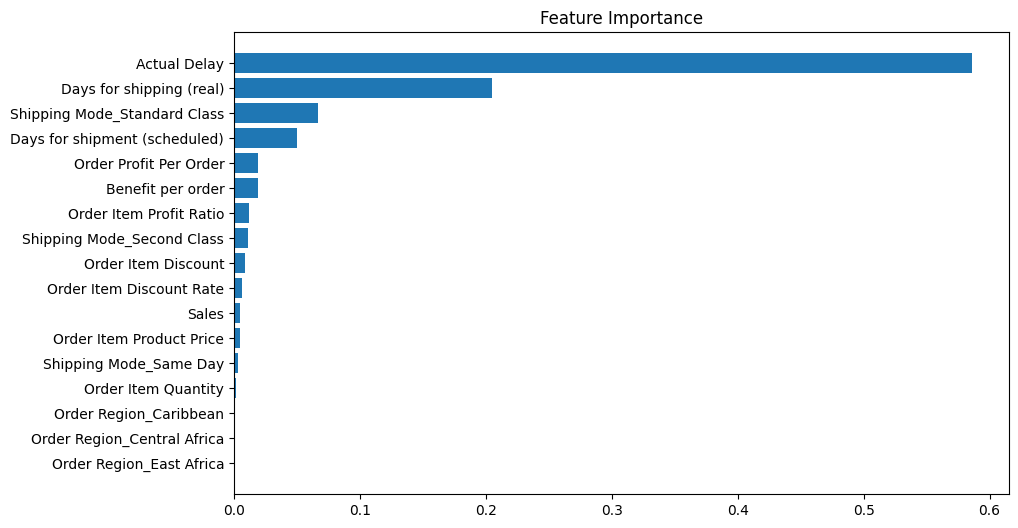

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 80],  # range
    'max_depth': [10, 20],     # options
    'min_samples_split': [2, 5],  # Key thresholds
    'min_samples_leaf': [1, 2],   # leaf options
}


# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

# Fit Grid Search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.9756604216934125


In [42]:
# Get the best model from Grid Search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9748504320850875
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     16307
           1       0.96      1.00      0.98     19797

    accuracy                           0.97     36104
   macro avg       0.98      0.97      0.97     36104
weighted avg       0.98      0.97      0.97     36104



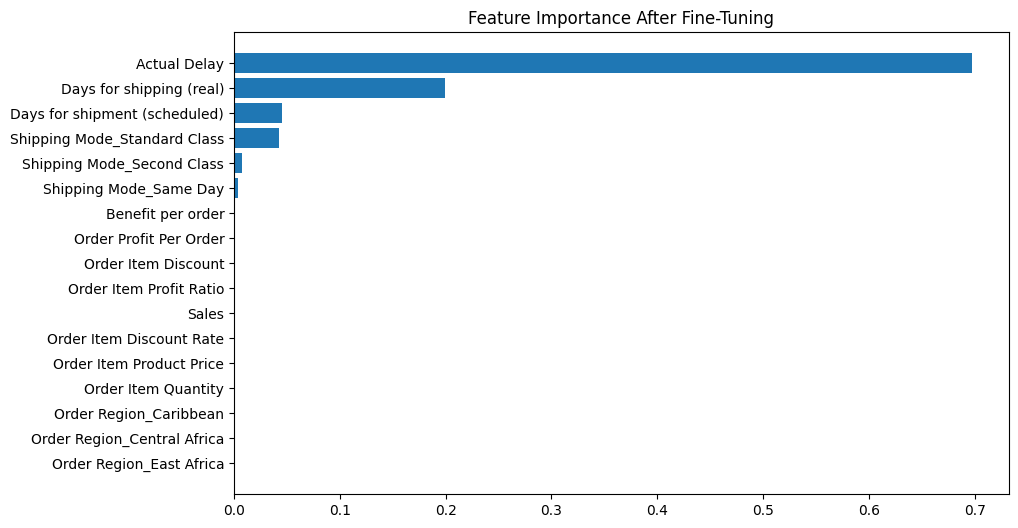

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance
feature_importances = best_rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance After Fine-Tuning')
plt.gca().invert_yaxis()
plt.show()


Comparing all Models

In [44]:
# Performance metrics
performance = {
    "Model": [ "Lasso Regularization","Linear Regression", "Random Forest"],
    "Mean Squared Error": [
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_rf)
    ],
    "R² Score": [
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf)
    ]
}

# Create a DataFrame for comparison
performance_df = pd.DataFrame(performance)

# Display the results
print(performance_df)


                  Model  Mean Squared Error  R² Score
0  Lasso Regularization            0.108404  0.562293
1     Linear Regression            0.080810  0.673710
2         Random Forest            0.029221  0.882013


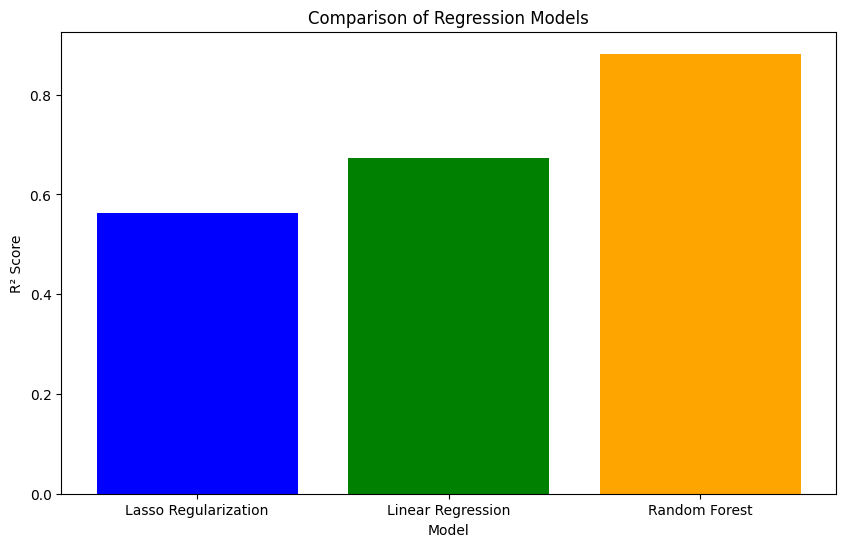

In [38]:
import matplotlib.pyplot as plt

# Plot R² scores for comparison
plt.figure(figsize=(10, 6))
plt.bar(performance_df['Model'], performance_df['R² Score'], color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Comparison of Regression Models')
plt.show()


### Optimization

##### Minimizing delivery delays

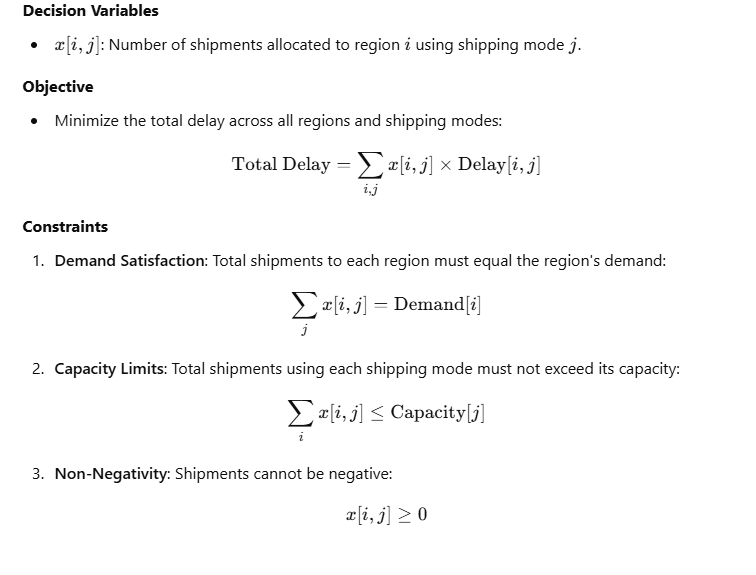



In [45]:
# Group data by Shipping Mode and calculate the average number of orders shipped
capacity = data.groupby('Shipping Mode').size().to_dict()

# Print calculated capacity for each mode
print(capacity)

{'First Class': 27814, 'Same Day': 9737, 'Second Class': 35216, 'Standard Class': 107752}


In [46]:

# Group by region and count the number of orders
demand = data.groupby('Order Region').size().to_dict()

print("Demand (Total Orders per Region):")
print(demand)

Demand (Total Orders per Region):
{'Canada': 959, 'Caribbean': 8318, 'Central Africa': 1677, 'Central America': 28341, 'Central Asia': 553, 'East Africa': 1852, 'East of USA': 6915, 'Eastern Asia': 7280, 'Eastern Europe': 3920, 'North Africa': 3232, 'Northern Europe': 9792, 'Oceania': 10148, 'South America': 14935, 'South Asia': 7731, 'South of  USA ': 4045, 'Southeast Asia': 9539, 'Southern Africa': 1157, 'Southern Europe': 9431, 'US Center ': 5887, 'West Africa': 3696, 'West Asia': 6009, 'West of USA ': 7993, 'Western Europe': 27109}


In [47]:
# Calculate total revenue from 'Order Item Total'
total_revenue = data['Order Item Total'].sum()

# Estimate the budget as 10% of the total revenue
budget_estimate = total_revenue * 0.10  # Adjust percentage as needed
print("Estimated Budget (10% of Total Revenue):", budget_estimate)



# Group by region and shipping mode to calculate average delay
delays = data.groupby(['Order Region', 'Shipping Mode'])['Actual Delay'].mean().to_dict()

# Print the delay dictionary
print("Delay Values (Region, Mode):")
print(delays)

Estimated Budget (10% of Total Revenue): 3305440.2380216625
Delay Values (Region, Mode):
{('Canada', 'First Class'): 1.0, ('Canada', 'Same Day'): 0.3333333333333333, ('Canada', 'Second Class'): 2.0301204819277108, ('Canada', 'Standard Class'): -0.2725694444444444, ('Caribbean', 'First Class'): 1.0, ('Caribbean', 'Same Day'): 0.5343680709534369, ('Caribbean', 'Second Class'): 2.03065603923973, ('Caribbean', 'Standard Class'): -0.039658933174697604, ('Central Africa', 'First Class'): 1.0, ('Central Africa', 'Same Day'): 0.3037974683544304, ('Central Africa', 'Second Class'): 2.127946127946128, ('Central Africa', 'Standard Class'): 0.11688311688311688, ('Central America', 'First Class'): 1.0, ('Central America', 'Same Day'): 0.4869992972593113, ('Central America', 'Second Class'): 1.9582193030468893, ('Central America', 'Standard Class'): 0.006918792143066549, ('Central Asia', 'First Class'): 1.0, ('Central Asia', 'Same Day'): 0.203125, ('Central Asia', 'Second Class'): 2.213675213675214,

In [48]:
# Define demand per region
demand = {
    'Canada': 959, 'Caribbean': 8318, 'Central Africa': 1677, 'Central America': 28341,
    'Central Asia': 553, 'East Africa': 1852, 'East of USA': 6915, 'Eastern Asia': 7280,
    'Eastern Europe': 3920, 'North Africa': 3232, 'Northern Europe': 9792, 'Oceania': 10148,
    'South America': 14935, 'South Asia': 7731, 'South of  USA ': 4045, 'Southeast Asia': 9539,
    'Southern Africa': 1157, 'Southern Europe': 9431, 'US Center ': 5887, 'West Africa': 3696,
    'West Asia': 6009, 'West of USA ': 7993, 'Western Europe': 27109
}

# Define capacity for each shipping mode
capacity = {
    'First Class': 27814, 'Same Day': 9737, 'Second Class': 35216, 'Standard Class': 107752
}

# Define delay for each (region, mode) pair
delays = {  # (Region, Mode): Average Delay
    ('Canada', 'First Class'): 1.0, ('Canada', 'Same Day'): 0.3333333333333333, ('Canada', 'Second Class'): 2.0301204819277108, ('Canada', 'Standard Class'): -0.2725694444444444,
    ('Caribbean', 'First Class'): 1.0, ('Caribbean', 'Same Day'): 0.5343680709534369, ('Caribbean', 'Second Class'): 2.03065603923973, ('Caribbean', 'Standard Class'): -0.039658933174697604,
    ('Central Africa', 'First Class'): 1.0, ('Central Africa', 'Same Day'): 0.3037974683544304, ('Central Africa', 'Second Class'): 2.127946127946128, ('Central Africa', 'Standard Class'): 0.11688311688311688,
    ('Central America', 'First Class'): 1.0, ('Central America', 'Same Day'): 0.4869992972593113, ('Central America', 'Second Class'): 1.9582193030468893, ('Central America', 'Standard Class'): 0.006918792143066549,
    ('Central Asia', 'First Class'): 1.0, ('Central Asia', 'Same Day'): 0.203125, ('Central Asia', 'Second Class'): 2.213675213675214, ('Central Asia', 'Standard Class'): 0.07119741100323625,
    ('East Africa', 'First Class'): 1.0, ('East Africa', 'Same Day'): 0.41836734693877553, ('East Africa', 'Second Class'): 1.9226519337016574, ('East Africa', 'Standard Class'): 0.03597122302158273,
    ('East of USA', 'First Class'): 1.0, ('East of USA', 'Same Day'): 0.48325358851674644, ('East of USA', 'Second Class'): 1.9726134585289514, ('East of USA', 'Standard Class'): 0.056174334140435836,
    ('Eastern Asia', 'First Class'): 1.0, ('Eastern Asia', 'Same Day'): 0.4852216748768473, ('Eastern Asia', 'Second Class'): 2.1152204836415365, ('Eastern Asia', 'Standard Class'): -0.020338983050847456,
    ('Eastern Europe', 'First Class'): 1.0, ('Eastern Europe', 'Same Day'): 0.3595505617977528, ('Eastern Europe', 'Second Class'): 1.9015544041450778, ('Eastern Europe', 'Standard Class'): 0.035899653979238756,
    ('North Africa', 'First Class'): 1.0, ('North Africa', 'Same Day'): 0.5751295336787565, ('North Africa', 'Second Class'): 1.980551053484603, ('North Africa', 'Standard Class'): -0.01756198347107438,
    ('Northern Europe', 'First Class'): 1.0, ('Northern Europe', 'Same Day'): 0.42359767891682787, ('Northern Europe', 'Second Class'): 1.9523809523809523, ('Northern Europe', 'Standard Class'): -0.01609078590785908,
    ('Oceania', 'First Class'): 1.0, ('Oceania', 'Same Day'): 0.42194744976816073, ('Oceania', 'Second Class'): 1.9277641277641278, ('Oceania', 'Standard Class'): 0.01360655737704918,
    ('South America', 'First Class'): 1.0, ('South America', 'Same Day'): 0.5412371134020618, ('South America', 'Second Class'): 1.9996462681287583, ('South America', 'Standard Class'): -0.008313934153641503,
    ('South Asia', 'First Class'): 1.0, ('South Asia', 'Same Day'): 0.5171503957783641, ('South Asia', 'Second Class'): 2.0431701030927836, ('South Asia', 'Standard Class'): -0.006862962143015275,
    ('South of  USA ', 'First Class'): 1.0, ('South of  USA ', 'Same Day'): 0.425531914893617, ('South of  USA ', 'Second Class'): 2.0386007237635706, ('South of  USA ', 'Standard Class'): -0.018479630407391853,
    ('Southeast Asia', 'First Class'): 1.0, ('Southeast Asia', 'Same Day'): 0.4212860310421286, ('Southeast Asia', 'Second Class'): 1.9656301145662847, ('Southeast Asia', 'Standard Class'): -0.003506926179203928,
    ('Southern Africa', 'First Class'): 1.0, ('Southern Africa', 'Same Day'): 0.72, ('Southern Africa', 'Second Class'): 1.86, ('Southern Africa', 'Standard Class'): 0.031335149863760216,
    ('Southern Europe', 'First Class'): 1.0, ('Southern Europe', 'Same Day'): 0.5746924428822495, ('Southern Europe', 'Second Class'): 1.938751472320377, ('Southern Europe', 'Standard Class'): -0.045936395759717315,
    ('US Center ', 'First Class'): 1.0, ('US Center ', 'Same Day'): 0.38699690402476783, ('US Center ', 'Second Class'): 1.9066666666666667, ('US Center ', 'Standard Class'): 0.017169923031379514,
    ('West Africa', 'First Class'): 1.0, ('West Africa', 'Same Day'): 0.3901345291479821, ('West Africa', 'Second Class'): 1.9796747967479675, ('West Africa', 'Standard Class'): 0.01056338028169014,
    ('West Asia', 'First Class'): 1.0, ('West Asia', 'Same Day'): 0.46236559139784944, ('West Asia', 'Second Class'): 1.9526578073089702, ('West Asia', 'Standard Class'): -0.014722536806342015,
    ('West of USA ', 'First Class'): 1.0, ('West of USA ', 'Same Day'): 0.49176470588235294, ('West of USA ', 'Second Class'): 1.9901960784313726, ('West of USA ', 'Standard Class'): -0.031752663463547104,
    ('Western Europe', 'First Class'): 1.0, ('Western Europe', 'Same Day'): 0.4889632107023411, ('Western Europe', 'Second Class'): 2.0564545788892974, ('Western Europe', 'Standard Class'): -0.0019541099344427635

}


In [51]:
from pulp import LpProblem, LpVariable, LpMinimize, lpSum, LpStatus

# Initialize the problem
problem = LpProblem("Delivery_Optimization", LpMinimize)

# Define regions and shipping modes
regions = list(demand.keys())
shipping_modes = list(capacity.keys())

# Decision variables: Number of shipments for each (region, mode) pair
x = LpVariable.dicts("Ship", [(r, m) for r in regions for m in shipping_modes], lowBound=0, cat='Integer')

# Objective function: Minimize total delay
problem += lpSum([x[(r, m)] * delays.get((r, m), 0) for r in regions for m in shipping_modes]), "Total_Delay"

# Constraints: Meet demand for each region
for r in regions:
    problem += lpSum([x[(r, m)] for m in shipping_modes]) == demand[r], f"Demand_{r}"

# Constraints: Do not exceed capacity for each shipping mode
for m in shipping_modes:
    problem += lpSum([x[(r, m)] for r in regions]) <= capacity[m], f"Capacity_{m}"

# Solve the problem
problem.solve()

# Print results
print("Optimization Status:", LpStatus[problem.status])
for r in regions:
    for m in shipping_modes:
        print(f"Shipments from {r} using {m}: {x[(r, m)].varValue}")


Optimization Status: Optimal
Shipments from Canada using First Class: 0.0
Shipments from Canada using Same Day: 0.0
Shipments from Canada using Second Class: 0.0
Shipments from Canada using Standard Class: 959.0
Shipments from Caribbean using First Class: 0.0
Shipments from Caribbean using Same Day: 0.0
Shipments from Caribbean using Second Class: 0.0
Shipments from Caribbean using Standard Class: 8318.0
Shipments from Central Africa using First Class: 0.0
Shipments from Central Africa using Same Day: 1677.0
Shipments from Central Africa using Second Class: 0.0
Shipments from Central Africa using Standard Class: 0.0
Shipments from Central America using First Class: 12278.0
Shipments from Central America using Same Day: 0.0
Shipments from Central America using Second Class: 16063.0
Shipments from Central America using Standard Class: 0.0
Shipments from Central Asia using First Class: 0.0
Shipments from Central Asia using Same Day: 553.0
Shipments from Central Asia using Second Class: 0.

In [52]:
for r in demand.keys():
    total_shipped = sum(x[(r, m)].varValue for m in shipping_modes)
    print(f"Total shipped to {r}: {total_shipped}, Demand: {demand[r]}")


Total shipped to Canada: 959.0, Demand: 959
Total shipped to Caribbean: 8318.0, Demand: 8318
Total shipped to Central Africa: 1677.0, Demand: 1677
Total shipped to Central America: 28341.0, Demand: 28341
Total shipped to Central Asia: 553.0, Demand: 553
Total shipped to East Africa: 1852.0, Demand: 1852
Total shipped to East of USA: 6915.0, Demand: 6915
Total shipped to Eastern Asia: 7280.0, Demand: 7280
Total shipped to Eastern Europe: 3920.0, Demand: 3920
Total shipped to North Africa: 3232.0, Demand: 3232
Total shipped to Northern Europe: 9792.0, Demand: 9792
Total shipped to Oceania: 10148.0, Demand: 10148
Total shipped to South America: 14935.0, Demand: 14935
Total shipped to South Asia: 7731.0, Demand: 7731
Total shipped to South of  USA : 4045.0, Demand: 4045
Total shipped to Southeast Asia: 9539.0, Demand: 9539
Total shipped to Southern Africa: 1157.0, Demand: 1157
Total shipped to Southern Europe: 9431.0, Demand: 9431
Total shipped to US Center : 5887.0, Demand: 5887
Total shi

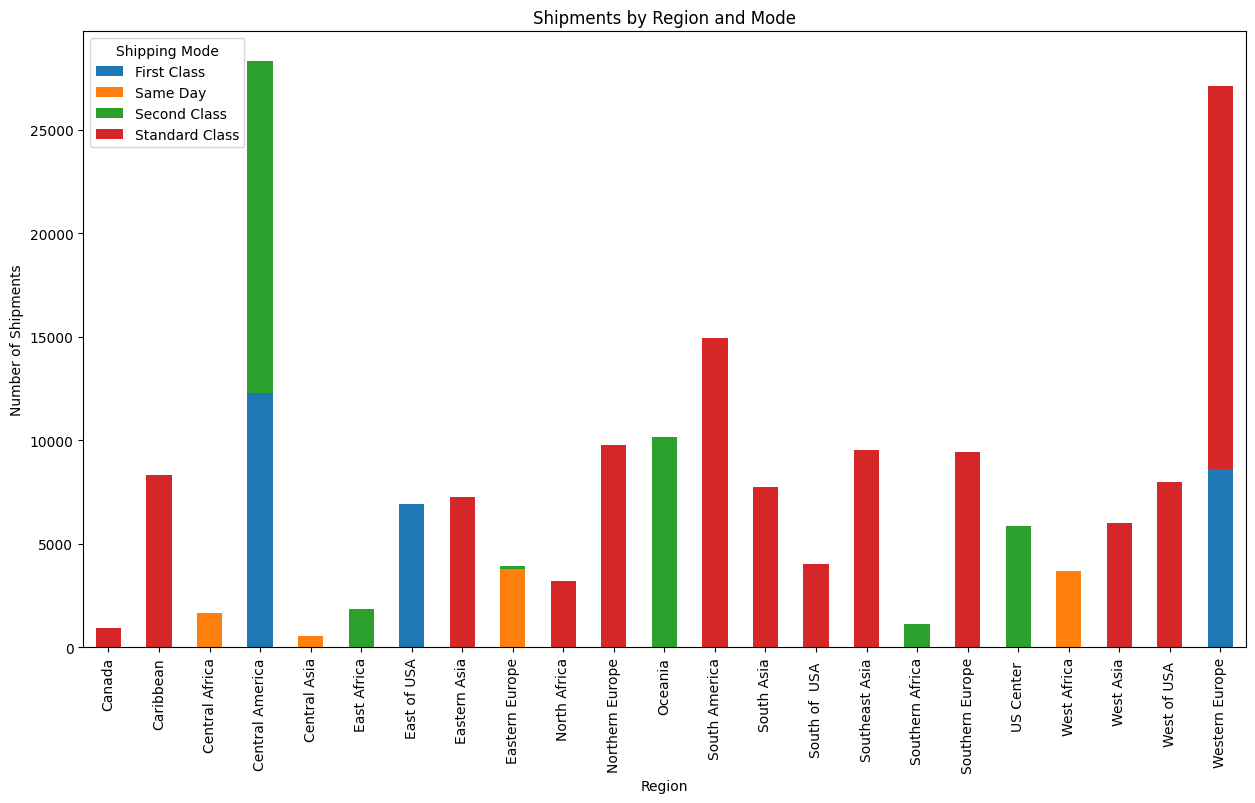

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for visualization
results = []
for r in regions:
    for m in shipping_modes:
        results.append({'Region': r, 'Mode': m, 'Shipments': x[(r, m)].varValue})

results_df = pd.DataFrame(results)

# Plot shipments by region
pivot = results_df.pivot(index='Region', columns='Mode', values='Shipments')
pivot.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title("Shipments by Region and Mode")
plt.ylabel("Number of Shipments")
plt.xlabel("Region")
plt.legend(title="Shipping Mode")
plt.show()
